Application and comparison of t-SNE, PCA, and Autoencoder on the mnist dataset. 

Mnist dataset is comprised of 70,000 handwriting sample of the numbers 0-9. 

We will inspect and analyze 2d representation of all numbers then find which numbers are better represented by which technique and why.

Comparison and analysis can be found following the implementation of each method.

Lastly, will be a summary of the paper: "Reducing the Dimensionality of Data with Neural Networks" (Hinton 2006) for deeper understanding.

In [1]:
#https://builtin.com/data-science/tsne-python#
import numpy as np
import pandas as pd
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #load 
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test)) #combine
X = X.reshape((X.shape[0], -1)) / 255.0 #reshape 28x28 into 784-d vectors and normalize by dividing by 255

In [3]:
feat_cols = ['pixel' + str(i) for i in range(X.shape[1])] #create list of feature namnes corresponding to each pixel
df = pd.DataFrame(X, columns=feat_cols) #create df w/ features
df['y'] = y #add column y
df['label'] = df['y'].apply(lambda i: str(i)) #add column converting num to str for ez plotting

In [4]:
#PCA#
time_start = time.time() #time for analysis
pca = PCA(n_components=50, random_state=42) #initialize pca reducing data to 50 components, rand state for reproducibility
pca_result = pca.fit_transform(df) 
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]
df['pca-three'] = pca_result[:, 2] #first 3 components added to df as columns
print('PCA done! Time elapsed: {} seconds'.format(time.time() - time_start)) 

PCA done! Time elapsed: 12.180654764175415 seconds


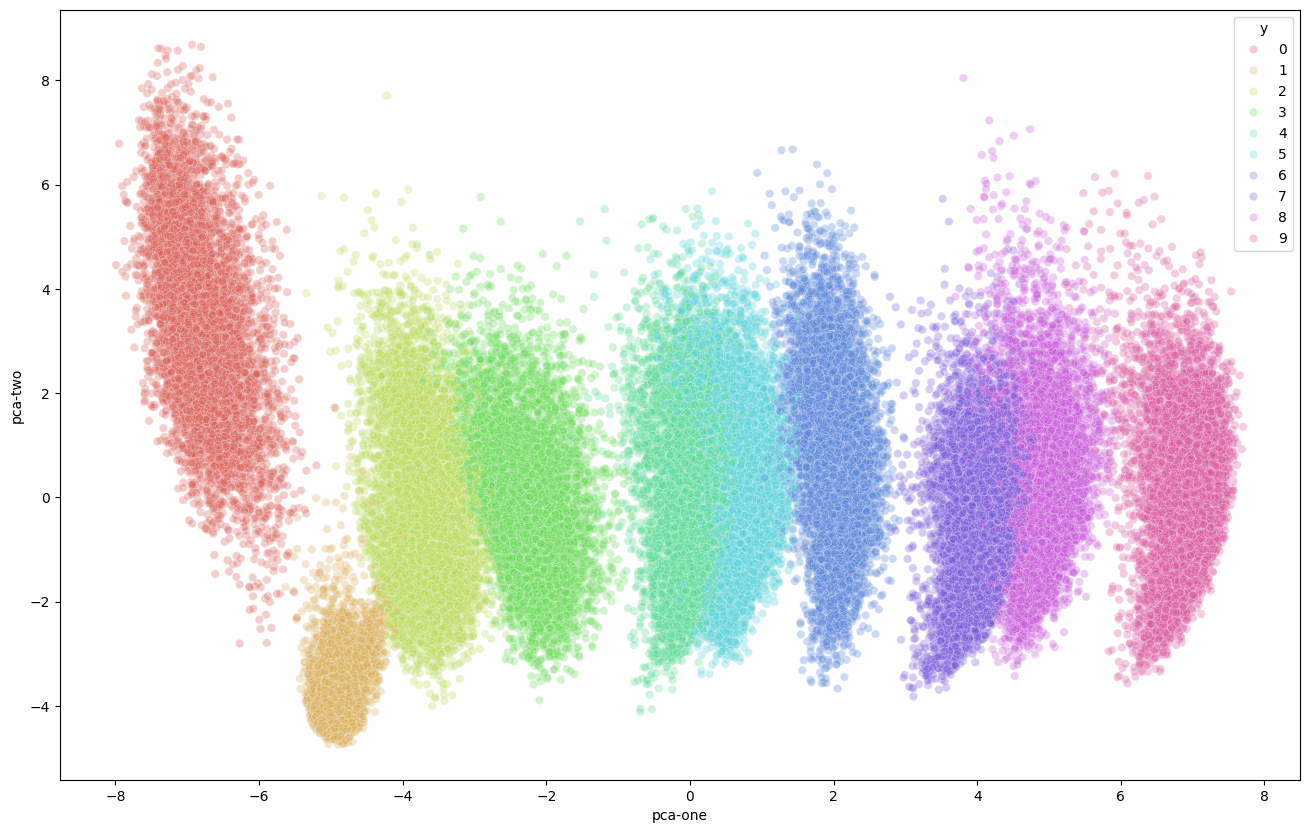

In [5]:
plt.figure(figsize=(16, 10)) #pca plot
sns.scatterplot(
    x="pca-one", y="pca-two", #create plot using first two components
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)
plt.show()

In [6]:
#TSNE#
time_start = time.time() #time for analysis
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=42) #initialize tsne with 2 components, set verbose=1 to print progress
#perplexity(0-50) set to 40 to balance between local(lower 0) and global(higher 50) structure
#300 iterations chosen to avoid highly intense computation but still converge efficiently
tsne_results = tsne.fit_transform(df)
df['tsne-2d-one'] = tsne_results[:, 0]
df['tsne-2d-two'] = tsne_results[:, 1] #add tsne 2d columns to df
print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

C:\Users\smith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.174s...
[t-SNE] Computed neighbors for 70000 samples in 58.172s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for s

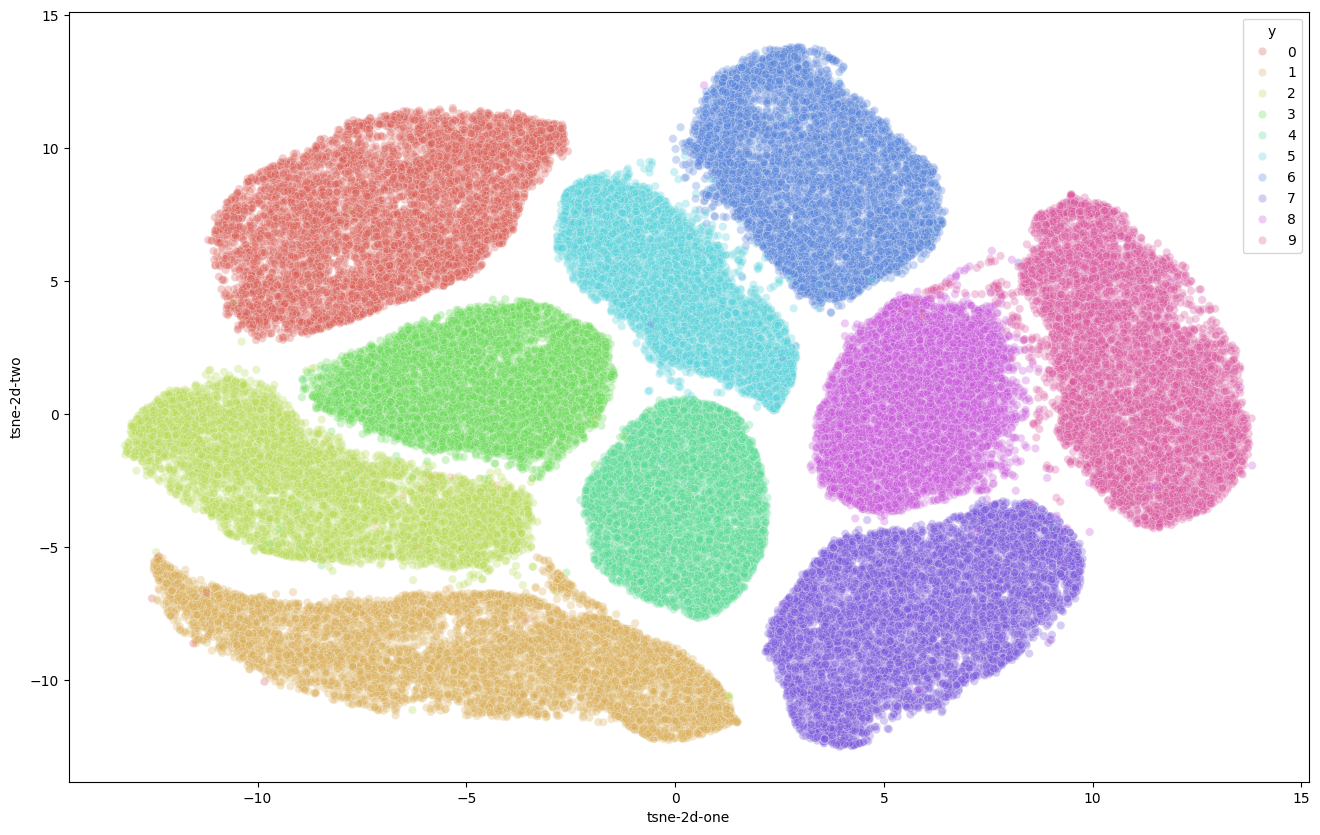

In [7]:
plt.figure(figsize=(16, 10)) #tsne plot
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)
plt.show()

In [8]:
#AUTOENCODER#
#https://towardsdatascience.com/how-to-make-an-autoencoder-2f2d99cd5103#
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

input_dim = X.shape[1] #input same 784 features
encoding_dim = 2  #dimensionality set to 2
#encoder
input_img = Input(shape=(input_dim,)) #input layer
#relu used as activation function to introduce non linearity, helps with vanishing gradient problem increasing efficiency 
encoded = Dense(128, activation='relu')(input_img) #first dense layer 128 neurons to capture complex patterns
encoded = Dense(64, activation='relu')(encoded) #second dense layer 64 neurons to learn more compressed rep of data
encoded = Dense(10, activation='relu')(encoded) #third dense layer 10 neurons further compression to learn
encoded_output = Dense(encoding_dim, activation='linear')(encoded) #output layer reduces to 2d, linear used for cont rep in 2d space
#decoder
#same idea as encoder just reversed to rebuild features of input
decoded = Dense(10, activation='relu')(encoded_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded_output = Dense(input_dim, activation='sigmoid')(decoded) #sigmoid used to ensure matching of 0-1 to normalized input
#autoencoder model
autoencoder = Model(input_img, decoded_output) #combines encoder and decoder
#encoder model
encoder = Model(input_img, encoded_output)
#compile autoencoder
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy') #adam used due to performance; adjust learning rate, efficient, robust to noise
#binary cross used treating each pixel as binary class prob, works well with sigmoid function (range 0-1)

In [12]:
time_start = time.time() #time for analysis
autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True, validation_split=0.2) #fit autoencoder
#50 epochs for balance between over underfit, batch 256 common used for efficiency/memory
print('Autoencoder training done! Time elapsed: {} seconds'.format(time.time() - time_start))

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1684 - val_loss: 0.1706
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1686 - val_loss: 0.1710
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1679 - val_loss: 0.1708
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1684 - val_loss: 0.1706
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1685 - val_loss: 0.1703
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1682 - val_loss: 0.1699
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1677 - val_loss: 0.1707
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1674 - val_loss: 0.1702
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1675 - val_loss: 0.1698
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1675 - val_loss: 0.1700
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1676 - val_loss: 0.1699
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


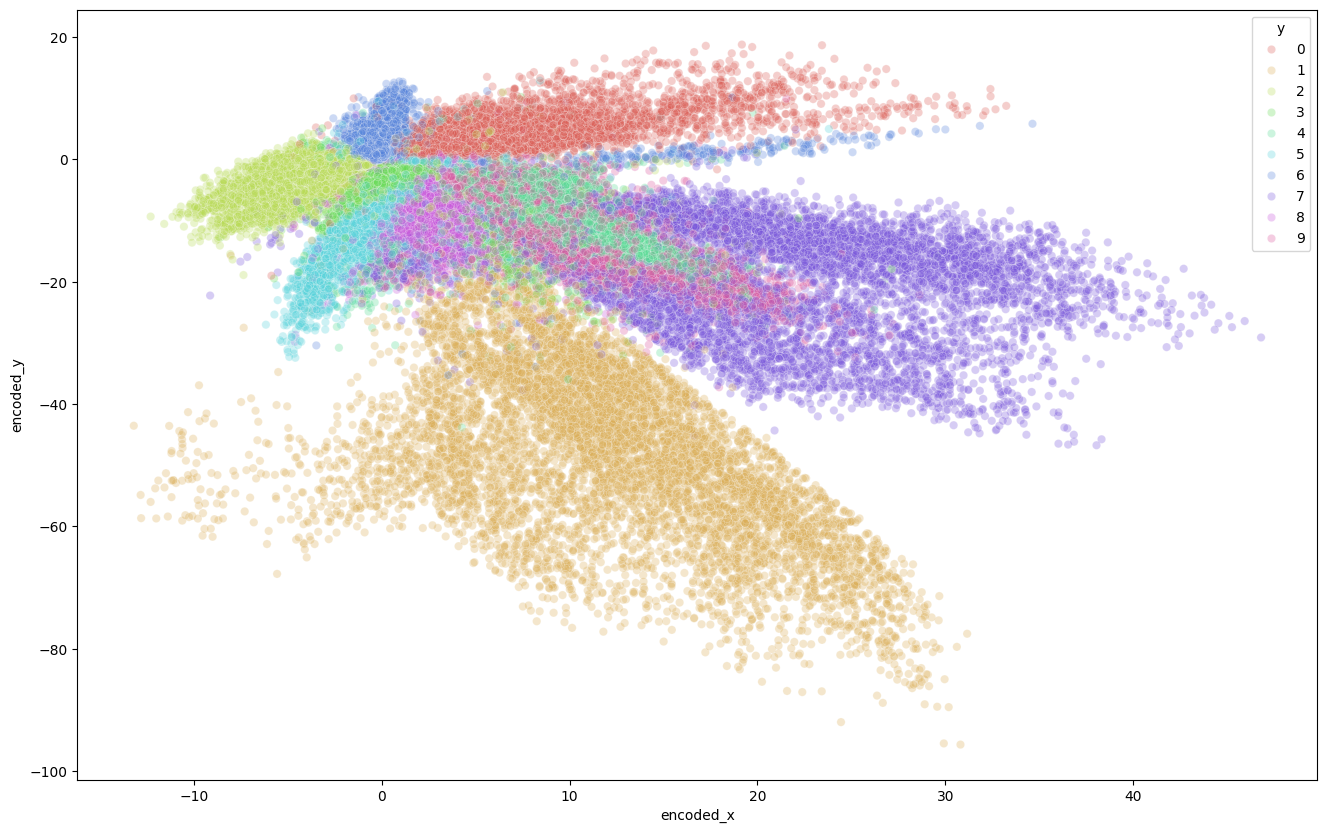

In [10]:
encoded_imgs = encoder.predict(X) #autoencoder plot
df['encoded_x'] = encoded_imgs[:, 0]
df['encoded_y'] = encoded_imgs[:, 1]

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='encoded_x', y='encoded_y',
    hue='y',
    palette=sns.color_palette('hls', 10),
    data=df,
    legend='full',
    alpha=0.3
)
plt.show()

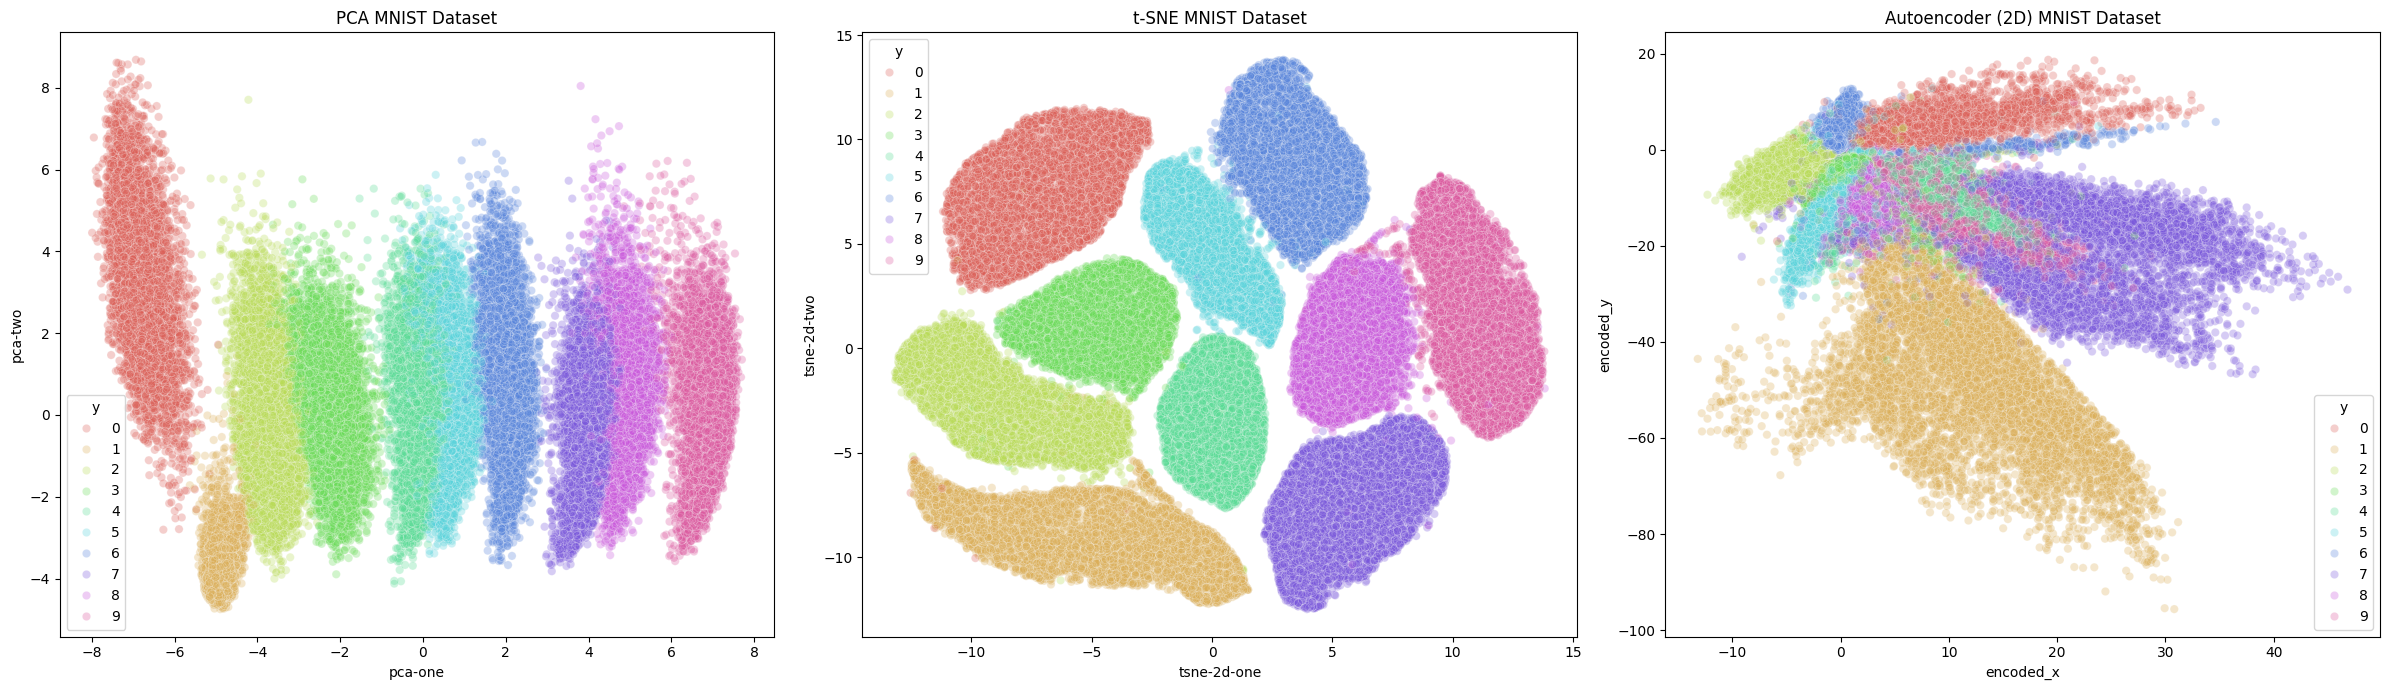

In [11]:
#side by side comparison of all plots: tsne, pca, autoencoder
plt.figure(figsize=(24, 7))  #figure size to accommodate three plots
#pca
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax1.set_title('PCA MNIST Dataset')
#tsne 
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax2.set_title('t-SNE MNIST Dataset')
#autoencoder
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x='encoded_x', y='encoded_y',
    hue='y',
    palette=sns.color_palette('hls', 10),
    data=df,
    legend='full',
    alpha=0.3,
    ax=ax3
)
ax3.set_title('Autoencoder (2D) MNIST Dataset')
plt.tight_layout()
plt.show()

Comparison and analysis: First, let us begin with a brief description of each method. PCA is short for principal component analysis, it is a linear statistical dimensionality reduction technique which works by transforming a large dataset into a smaller one while maintaining most of the features. T-SNE is short for t-distributed stochastic neighbor embedding, in short, it takes points from high dimensional data and puts it into lower dimension while preserving the neighborhood. Lastly, autoencoder is a neural network model that learns input data by compressing it into lower dimesnsion, encoding, then rebuilds from the compressed form, decoding. To compare the results of each method, first we will look at the runtime; PCA was the fastest, running in 12.18 seconds, next autoencoder ran in 83.67 seconds, last was t-SNE which took 429.26 seconds to run. Does this make sense in the context of our dataset? Yes, it does, PCA is an efficient linear dimensionality reduciton technique that is quite efficient, autoencoder is computationally intensive, but still faster than t-SNE (perhaps due to running 50 epochs), t-SNE is complex, iterative in nature, and known to be computationally intensive with a large dataset, so it makes sense that it took the longest. Finally, let us examine which numbers are better represented by each technique. PCA: digits 0 and 1 form a relatively distinct cluster, but digits 2-9 overlap to some degree and are more spread out instead of distinctly clustered. This is perhaps due to the fact that 0 and 1 are extremely different shapes and easier to linearly seperate. t-SNE: 0-9 are distinctly clustered suggesting that t-SNE captured the non-linear relationship of the mnist dataset very well, with some slight overlap in digits 8 and 9. This is due to the fact that t-SNE captures non-linear relationships very well. Autoencoder: digits 0,1,4,8 form a relatively distinct cluster but all of the rest of the digits 2,3,5,6,7,9 are mostly overlapping and not distinctly seperated. This is perhaps due to the fact that representation in 2d is not ideal for autoencoder because they learn compressed representation, or the initial values were not optimal. The technique that performed the best for the mnist dataset is very clearly t-SNE.

Summary: "Reducing the Dimensionality of Data with Neural Networks" (Hinton 2006)

A very common method of dimensionality reduction is known as PCA principal component analysis. It works by finding the direction of the largest variance in the dataset and marks each point with the coordinates in each of the directions. A nonlinear generalization of PCA that uses multilayyer networks to transform high dimensional data into low dimensional data is known as autoencoders. They use multilayer "encoder" networks then transform the high dimensional data into low dimensional code using a "decoder" to rebuild the data. It works by starting with random weights in each network and training them together. Then backpropagation is done by using the chain rule and passing the errors first through the decoder then through the encoder. Some challenges of the autoencoder method are choosing optimal weights with multiple hidden layers. If you begin with a weight too large you find a suboptimal local minimum, on the other hand if you begin with a weight that is too small, the gradient is minimal and makes training autoencoders impossible. However, if the initially chosen weights are relatively similar to a solution, the gradient descent works well. To find these optimal weights requires a pretraining proceudre which learns a single layer at a time. It learns one layer at a time using RBMs (Restricted Boltzmann Machines) which the visible binary pixels are connected to binary feature detectprs, which are hidden, using symmetric weighted connections. This creates an energy which allows the network to assign a probability to each image. To adjust the probability of each image the weight and bias can be adjusted which changes the energy of the image. Then to train layer-by-layer learning is used in which higher correlation between features are captured. Each layers activities, if driven by the data, can be treated as data for the next layer to learn from. This process can be repeated as many times as one might need and largely depends on the problem being adressed and dataset. After training multiple layers the model is "unfolded" which produces encoder and decoder networks that start with the samae weifhts. Fine tuning is then achieved with bakcpropagation through the whole autoencoder which leads to optimal reconstruciton. In their expirements they used synthetic data on curves from random points and the autoencoder outperformed PCA in recontruction of the data. They then used the mnist dataset and again autoencoder outperformed PCA in reconstruction. Lastly, they trained an autoencoder on newswire stories for document retrieval and autoencoder performed better than LSA (latent semantic analysis) for document retrieval. Overall, autoencoder performed very well and are a great tool to have in the machine learning toolkit. Autoencoders are a very powerful tool ideal for nonlinear dimensionality reduction and large datasets. In this paper it has been shown that autoencoders with the proper pretraining and fine tuning outperform popular methods such as PCA in dimensionality reduction and reconstruciton.